# EXPLORATION 13. Face2Emoji 모바일 웹앱 만들기

## Import

In [9]:
import numpy as np
import tqdm
import os
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import tensorflowjs as tfjs

## Dataset

In [2]:
train_x = []
train_y = []
eval_x = []
eval_y = []

csv_path = os.getenv('HOME')+'/aiffel/Face2Emoji/data/fer2013.csv'

with open(csv_path) as f:
  for line in tqdm.tqdm(f.read().splitlines()[1:]):
    emotion, pixels, usage = line.split(',')
    
    x = np.array(pixels.split(' ')).astype(float).reshape(48, 48, 1) / 255
    y = int(emotion)

    if usage == 'PrivateTest':
      eval_x.append(x)
      eval_y.append(y)
    else:
      train_x.append(x)
      train_y.append(y)

print('train : {}, eval :{}'.format(len(train_x), len(eval_x)))

100%|██████████| 35887/35887 [00:23<00:00, 1522.81it/s]

train : 32298, eval :3589


Angry
(32298, 48, 48, 1)


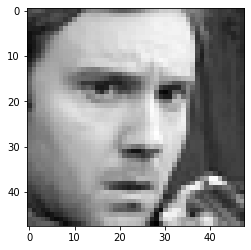

In [3]:
LABELS = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

print(LABELS[train_y[0]])
plt.imshow(train_x[0].reshape([48, 48]), cmap='gray')

print(np.stack(train_x).shape)

## Model

In [4]:
# model 선언 
model = MobileNetV2(input_shape=(48, 48, 1), weights=None, classes=7)

In [5]:
# model.compile
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])


In [6]:
model_path = os.getenv('HOME')+'/aiffel/Face2Emoji/emoji_model.h5'

es = EarlyStopping(patience=30,
                   verbose=1,
                   monitor = 'val_categorical_accuracy')
        
mc = ModelCheckpoint(model_path,
                     save_best_only=True,
                     verbose=1)
        
rlp = ReduceLROnPlateau(monitor='val_loss',
                        patience=10,
                        factor=0.7)
       

In [7]:
#model.fit
model.fit(np.stack(train_x),
          tf.keras.utils.to_categorical(train_y),
          epochs=100,
          batch_size=32,
          validation_data=(np.stack(eval_x), tf.keras.utils.to_categorical(eval_y)),
          callbacks=[es, mc, rlp]
         )

Epoch 1/100
1010/1010 [==============================] - ETA: 0s - loss: 1.7619 - categorical_accuracy: 0.2899
Epoch 00001: val_loss improved from inf to 1.88254, saving model to /home/aiffel0046/aiffel/Face2Emoji/emoji_model.h5
1010/1010 [==============================] - 50s 50ms/step - loss: 1.7619 - categorical_accuracy: 0.2899 - val_loss: 1.8825 - val_categorical_accuracy: 0.1471
Epoch 2/100
1009/1010 [============================>.] - ETA: 0s - loss: 1.5704 - categorical_accuracy: 0.3961
Epoch 00002: val_loss improved from 1.88254 to 1.87146, saving model to /home/aiffel0046/aiffel/Face2Emoji/emoji_model.h5
1010/1010 [==============================] - 14s 14ms/step - loss: 1.5705 - categorical_accuracy: 0.3962 - val_loss: 1.8715 - val_categorical_accuracy: 0.1471
Epoch 3/100
1008/1010 [============================>.] - ETA: 0s - loss: 1.4726 - categorical_accuracy: 0.4348
Epoch 00003: val_loss improved from 1.87146 to 1.83394, saving model to /home/aiffel0046/aiffel/Face2Emoji/em

1010/1010 [==============================] - ETA: 0s - loss: 0.4775 - categorical_accuracy: 0.8280
Epoch 00025: val_loss did not improve from 1.42749
1010/1010 [==============================] - 14s 14ms/step - loss: 0.4775 - categorical_accuracy: 0.8280 - val_loss: 1.6001 - val_categorical_accuracy: 0.5642
Epoch 26/100
1006/1010 [============================>.] - ETA: 0s - loss: 0.4137 - categorical_accuracy: 0.8526
Epoch 00026: val_loss did not improve from 1.42749
1010/1010 [==============================] - 14s 13ms/step - loss: 0.4143 - categorical_accuracy: 0.8525 - val_loss: 1.7053 - val_categorical_accuracy: 0.5687
Epoch 27/100
1010/1010 [==============================] - ETA: 0s - loss: 0.3575 - categorical_accuracy: 0.8727
Epoch 00027: val_loss did not improve from 1.42749
1010/1010 [==============================] - 14s 14ms/step - loss: 0.3575 - categorical_accuracy: 0.8727 - val_loss: 1.7761 - val_categorical_accuracy: 0.5623
Epoch 28/100
1006/1010 [=======================

Epoch 51/100
1008/1010 [============================>.] - ETA: 0s - loss: 0.0567 - categorical_accuracy: 0.9804
Epoch 00051: val_loss did not improve from 1.42749
1010/1010 [==============================] - 14s 13ms/step - loss: 0.0567 - categorical_accuracy: 0.9805 - val_loss: 2.8472 - val_categorical_accuracy: 0.5726
Epoch 52/100
1010/1010 [==============================] - ETA: 0s - loss: 0.0588 - categorical_accuracy: 0.9797
Epoch 00052: val_loss did not improve from 1.42749
1010/1010 [==============================] - 14s 14ms/step - loss: 0.0588 - categorical_accuracy: 0.9797 - val_loss: 2.8026 - val_categorical_accuracy: 0.5832
Epoch 53/100
1009/1010 [============================>.] - ETA: 0s - loss: 0.0544 - categorical_accuracy: 0.9807
Epoch 00053: val_loss did not improve from 1.42749
1010/1010 [==============================] - 14s 14ms/step - loss: 0.0544 - categorical_accuracy: 0.9807 - val_loss: 2.9537 - val_categorical_accuracy: 0.5846
Epoch 54/100
1009/1010 [==========

Epoch 77/100
1010/1010 [==============================] - ETA: 0s - loss: 0.0129 - categorical_accuracy: 0.9954
Epoch 00077: val_loss did not improve from 1.42749
1010/1010 [==============================] - 14s 13ms/step - loss: 0.0129 - categorical_accuracy: 0.9954 - val_loss: 3.6064 - val_categorical_accuracy: 0.5913
Epoch 78/100
1008/1010 [============================>.] - ETA: 0s - loss: 0.0139 - categorical_accuracy: 0.9942
Epoch 00078: val_loss did not improve from 1.42749
1010/1010 [==============================] - 14s 14ms/step - loss: 0.0139 - categorical_accuracy: 0.9942 - val_loss: 3.6182 - val_categorical_accuracy: 0.5843
Epoch 79/100
1007/1010 [============================>.] - ETA: 0s - loss: 0.0138 - categorical_accuracy: 0.9953
Epoch 00079: val_loss did not improve from 1.42749
1010/1010 [==============================] - 14s 14ms/step - loss: 0.0138 - categorical_accuracy: 0.9953 - val_loss: 3.6257 - val_categorical_accuracy: 0.5929
Epoch 80/100
1006/1010 [==========

In [8]:
loaded_model = tf.keras.models.load_model(model_path)

In [12]:
model_ = os.getenv('HOME')+'/aiffel/Face2Emoji/model'
tfjs.converters.save_keras_model(loaded_model, model_)

/home/aiffel0046/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflowjs/converters/keras_h5_conversion.py:123: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)


## Report

Face2Emoji app - [Face2Emoji](https://jaeheee.github.io/Face2Emoji/)

Face2Emoji app을 만들어보았습니다. 하지만 정확도가 좋지는 않습니다.  

<br>

##### 문제점
- emoiton label별 이미지의 수가 불균형합니다.
- model에서 48x48의 이미지를 학습하지만, 실제 카메라에 들어오는 이미지는 이보다 더 큽니다. 값의 차이가 많이 날 경우 정확도가 더 떨어질 것입니다.
- 같은 사람, 같은 표정이어도 각도에 따라 측정이 달라집니다.
- label이 잘못 분류된 이미지들이 존재합니다.

<br>

##### 개선방안
- emoiton label의 균형을 맞춰주고, 데이터의 수를 증가시킵니다.
- 영상에서 얼굴부분만을 찾아내서 자른 후, 모델을 적용시킵니다.
- emotion을 이미 학습시킨 좋은 성능은 모델을 이용하여, 재학습 시킵니다.
- 이미지를 재분류하고, 분류할 수 없는 사진은 삭제합니다.